# CS113 Deep Dive

## Model Analysis Report

### Location and Network Representation

![Taipei Station](taipei.png)


As group members were not located in the same city, we opted to choose a railway hub, since this type of site is ubiquitous and has analogues in Seoul and Taipei. We collected data from Taipei and Seoul stations. Though the station layouts and importance in the city and national rail networks do vary, we strived to collect comparable data by modeling passenger movement between two rail platforms and major areas of the station. In Taipei, these were the high speed rail platforms (Taipei is penultimate to the Nangang terminus, and most passengers head south toward Zuoying). The HSR platforms are opposite and passengers cannot change platforms without passing via the lobby, while the mall, lobby and service desk are all interconnected. 

![Seoul Station](seoul.png)


In Seoul, the initial layout from which we collected data was not homeomorphic to the layout of the network for the collected data. However, after some adjustments and estimations we generated an equivalent homeomorphic layout that can be described as follows: starting from the main lobby of the station, you can get access to the subway lines 1 and 4, the high speed railway KTX and the interior mall.  From each of the subway lines, you can access the lobby or the high speed rail KTX; similarly, from the mall you can access both the lobby and the KTX. This way, we have that the lobby and the KTX are central nodes of the network in the adjusted layout for the Seoul Station.


### Data Collection Procedure

We collected data at both Taipei and Seoul stations, both major rail hubs of their respective cities. In Taipei, data was collected standing in one spot and counting the number of people observed at and in transit to each area in a 30 second interval, repeated five times (five samples per node and edge). 

In Seoul, we applied a similar data collection strategy to ensure consistency with our Taipei measurements. We observed and counted the flow of passengers at designated spots within the station. To accommodate for the difference in station layouts and the flow dynamics, we decided on a 1-minute interval for observation. During this period, we took three samples at each significant location within the station.

Our estimation process involved standardizing these observations to create a comparable dataset between the two cities. We normalized the data from Seoul to represent the average number of people moving in a 30-second window, matching the Taipei interval. This adjustment allowed us to create a unified model of passenger flow that could be analyzed collectively.

We made several assumptions during our data collection to facilitate a coherent study: firstly, that the time slots chosen were representative of a standard flow pattern in both Taipei and Seoul stations; secondly, that the passenger movement was uniform and did not significantly fluctuate between the intervals; and thirdly, that the recorded samples were adequate in capturing the complexity of the stations' dynamics. These assumptions were necessary to model and compare the two stations' passenger flows effectively within the constraints of our methodology.

### Analysis

From the we collected, we generated three Markov matrices representing the evolution people's distribution in Seoul Station, Taipei Station and a combined model; in particular, the Markov process shows the evolution of the distribution after 30 seconds. To generate the matrices, some data preprocessing (i.e., normalizing so that the columns add up to $1$) was required. The following matrices $S, T, M$ represent the Markov processes for Seoul Station, Taipei Station, and the combined model, respectively.

$$
S = \begin{bmatrix}
0.4373 & 0.7778 & 0.6579 & 0.5556 & 0.6258 \\
0.1376 & 0.2222 & 0.0000 & 0.1852 & 0.0000 \\
0.04914 & 0.0000 & 0.3421 & 0.1111 & 0.0000 \\
0.2285 & 0.0000 & 0.0000 & 0.05093 & 0.0000 \\
0.1474 & 0.0000 & 0.0000 & 0.09722 & 0.3741
\end{bmatrix}
$$

$$
T = \begin{bmatrix}
0.07407 & 0.4140 & 0.3654 & 0.3913 & 0.5726 \\
0.5407 & 0.5649 & 0.0000 & 0.04348 & 0.0000 \\
0.07407 & 0.0000 & 0.5192 & 0.04348 & 0.0000 \\
0.03704 & 0.02105 & 0.1154 & 0.5217 & 0.008065 \\
0.2741 & 0.0000 & 0.0000 & 0.0000 & 0.4194
\end{bmatrix}
$$

$$
M = \begin{bmatrix}
0.3075 & 0.5316 & 0.5645 & 0.5179 & 0.6081 \\
0.2702 & 0.4658 & 0.0000 & 0.1833 & 0.0000 \\
0.06056 & 0.0000 & 0.4274 & 0.1195 & 0.0000 \\
0.1584 & 0.002632 & 0.008065 & 0.09163 & 0.0000 \\
0.2034 & 0.0000 & 0.0000 & 0.08765 & 0.3919
\end{bmatrix}
$$

For the simplicity, let's focus on the combined model $M$. To determine the stable distributions for $M$, we can look at the eigenvalues and eigenvectors for the matrix. Since this corresponds to a Markov process, we know that the matrix representing it will have at least one eigenvalue with an eigenvector of $1$, which corresponds to the stable distribution as applying the Markov process $M$ to an eigenvector $\vec{y}$ corresponds to multiplying by it's corresponding eigenvalue $M\vec{u}=\lambda \vec{u}$. A numerical approximation for the eigenvalues and eigenvectors for $M$ yields:

$$
\lambda_1 = -0.2373,\quad
\vec{u}_1 = (1, -0.2593, -0.0049, -0.4792, -0.2564) \\[10pt]

\lambda_2 = 0.0673,\quad
\vec{u}_2 = (1, 2.8297, 2.3634, -7.62585, 1.4326) \\[10pt]

\lambda_3 = 0.4125,\quad
\vec{u}_3 = (1, -6.0494, -6.3409, 0.2846, 11.1058) \\[10pt]

\lambda_4 = 0.4417,\quad
\vec{u}_4 = (1, -15.3194, 8.7445, 0.5387, 5.0361) \\[10pt]

\lambda_5 = 1,\quad
\vec{u_5} = (1, 0.5665, 0.1427, 0.1772, 0.3600)
$$

As mentioned before, the stable distribution for the studied Markov process corresponds to the eigenvector associated with the eigenvalue of $1$, with the necessary normalizations to make it a valid distribution (i.e., adjusted by the sum of the components). Furthermore, we note how from the computed eigenvectors, $\vec{u}_5$ appears to be the only valid distribution as the all the others involve a negative component which in our model would imply a negative proportion of people.

![Stable Distribution](stable.png)

From the figure above, we can check that the distribution $\vec{u}_5$ with the eigenvalue of $1$ remains stable over time.

Since we have $5$ distinct real eigenvalues, each with a multiplicity of $1$, we know that the corresponding eigenvectors form a basis for $\mathbb{R}^5$. Therefore we could consider the effect of $M$ by looking at the transformation over the components determined by the eigenvectors (i.e., $M\vec{v} = \sum{\lambda_i \cdot \vec{u}_i}$). Since all the eigenvalues with $i \ne 5$ are in the range $(0, 1)$, we know that over time the dominating component for the distributions will be $\vec{u}_5$, which allows us to conclude that over time any given non-trivial distribution will converge to the stable distribution.

![Random Initial Distributions](random.png)

From the figure above, we can check that a set of $K=10$ initial random distributions ended up converging to the stable distribution $\vec{u}_5$

### Appendix

## 1. Pre-processing data for Seoul Station

In [62]:
# Raw data collected at Seoul Station (transposed)
seoul_data = [
    [35.6, 11.2,4, 18.6, 12],
    [11.2, 3.2, 0, 0, 0],
    [10, 0, 5.2, 0, 0],
    [24, 8, 4.8, 2.2, 4.2],
    [18.4, 0, 0, 0, 11]
]

# Normalize the data
seoul_data = [[entry / sum(row) for entry in row] for row in seoul_data]

seoul = matrix(QQ, seoul_data).T



## 2. Pre-processing data for Taipei Station

In [63]:
# Raw data collected at Taipei Station (transposed)
taipei_data = [
    [ 4. , 29.2,  4. ,  2. , 14.8],
    [23.6, 32.2,  0. ,  1.2,  0. ],
    [ 3.8,  0. ,  5.4,  1.2,  0. ],
    [ 1.8,  0.2,  0.2,  2.4,  0. ],
    [14.2,  0. ,  0. ,  0.2, 10.4]
]

# Normalize the data
taipei_data = [[entry / sum(row) for entry in row] for row in taipei_data]

taipei = matrix(QQ, taipei_data).T



## 3. Pre-processing data for the combined model

In [64]:
# Merged data (transposed)
M_data = [
    [19.8, 17.4, 3.9, 10.2, 13.1],
    [20.2, 17.7, 0, 0.1, 0],
    [7, 0, 5.3, 0.1, 0],
    [13, 4.6, 3, 2.3, 2.2],
    [16.6, 0, 0, 0, 10.7],
]

# Normalize the data
M_data = [[entry / sum(row) for entry in row] for row in M_data]

M = matrix(QQ, M_data).T


## 4. Computing the stable distribution for Seoul Station

In [ ]:
(seoul_eigenvalues, seoul_eigenvectors), *_ = [(value, vectors) for value, vectors, _ in seoul.eigenvectors_right() if abs(value - 1) < 0.01]

seoul_eigenvector, *_ = seoul_eigenvectors
seoul_eigenvector

(1, 0.234228526911454?, 0.115354946964703?, 0.2407622700305627?, 0.272952780216831?)

In [ ]:
u = vector((1, 0.234228526911454, 0.115354946964703, 0.2407622700305627, 0.272952780216831))
u / sum(u)

(0.536682655545158, 0.125706387827270, 0.0619089992672876, 0.129212934435083, 0.146489022925203)

## 5. Computing the stable distribution for Taipei Station

In [ ]:
(taipei_eigenvalues, taipei_eigenvectors), *_ = [(value, vectors) for value, vectors, _ in taipei.eigenvectors_right() if abs(value - 1) < 0.01]

taipei_eigenvector, *_ = taipei_eigenvectors
taipei_eigenvector

(1, 1.2610241028135?, 0.1705380231497?, 0.1820532830474?, 0.47201646090535?)

In [ ]:
u = vector((1, 1.2610241028135, 0.1705380231497, 0.1820532830474, 0.47201646090535))
u / sum(u)

(0.324082729942519, 0.408676133763115, 0.0552684281013553, 0.0590003249649995, 0.152972383228012)

## 6. Computing the stable distribution for the combined model

In [61]:
[(value, vectors) for value, vectors, _ in M.eigenvectors_right()]


[(-0.2373629284850361?,
  [(1, -0.259347075921888?, -0.004935901909092?, -0.4792234741172626?, -0.2564935480517587?)]),
 (0.0673881192493143?,
  [(1, 2.829761473538558?, 2.363400004174158?, -7.625855476880070?, 1.432693999167355?)]),
 (0.4125039288253620?,
  [(1, -6.049467435280674?, -6.340968406384079?, 0.2846276321903771?, 11.10580820947438?)]),
 (0.4417079831591982?,
  [(1, -15.31945980251613?, 8.744544319294854?, 0.538717429573845?, 5.036198053647425?)]),
 (1.000000000000001?,
  [(1, 0.566582494210659?, 0.14276911217994?, 0.1772714620542479?, 0.360086813797977?)])]

In [60]:
(eigenvalues, eigenvectors), *_ = [(value, vectors) for value, vectors, _ in M.eigenvectors_right() if abs(value - 1) < 0.01]

eigenvector, *_ = eigenvectors
eigenvector

(1.000000000000001?,
 [(1, 0.566582494210659?, 0.14276911217994?, 0.1772714620542479?, 0.360086813797977?)])

In [ ]:
u = vector((1, 0.566582494210659, 0.14276911217994, 0.1772714620542479, 0.360086813797977))
u / sum(u)

(0.445095295971961, 0.252183202953225, 0.0635458602413845, 0.0789026938704178, 0.160272946963011)

## 7. Code for generating figure showing the converging distribution

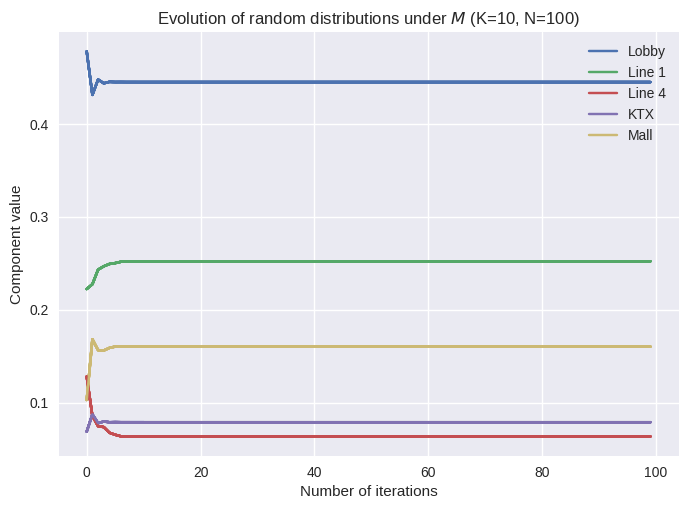

In [79]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

M = np.array(M_data).T

# Indicates the dimension of the distribution
D = 5

# Indicates the number of iterations
N = 100

# Indicates the number of random samples
K = 10

vectors = np.random.rand(N, D)
vectors = vectors / vectors.sum(axis=1)[:, np.newaxis]

data = np.zeros((K, D, N))

for n in range(N):
    vectors = M.dot(vectors.T).T

    for k in range(K):
        for d in range(D):
            data[k, d, n] = vectors[n, d]

for k in range(K):
    for d in range(D):
        plt.plot(data[k, d, :], color=f"C{d}")

plt.xlabel("Number of iterations")
plt.ylabel("Component value")
plt.title(f"Evolution of random distributions under $M$ (K={K}, N={N})")
plt.legend(["Lobby", "Line 1", "Line 4", "KTX", "Mall"])
plt.show()

## 8. Code for generating figure showing behavior for stable distribution

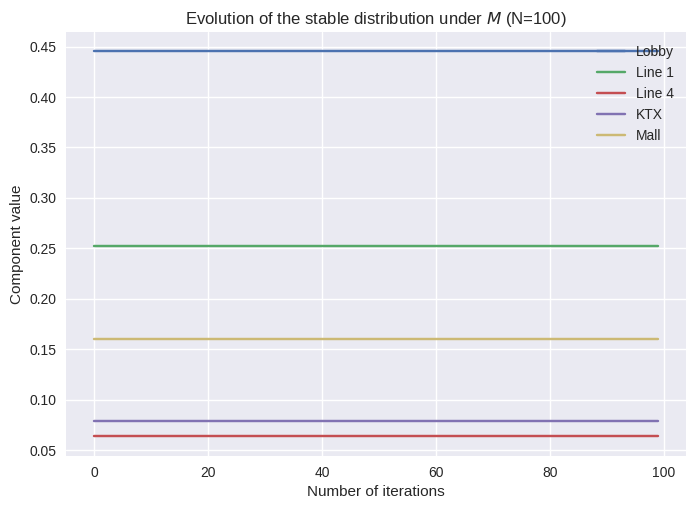

In [80]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array(M_data).T

# Indicates the number of iterations
N = 100

vector = np.array([1, 0.566582494210659, 0.14276911217994, 0.1772714620542479, 0.360086813797977])
vector = vector / vector.sum()

data = np.zeros((D, N))
for n in range(N):
    vector = M.dot(vector)

    for d in range(D):
        data[d, n] = vector[d]

for d in range(D):
    plt.plot(data[d, :], color=f"C{d}")

plt.xlabel("Number of iterations")
plt.ylabel("Component value")
plt.title(f"Evolution of the stable distribution under $M$ (N={N})")

plt.legend(["Lobby", "Line 1", "Line 4", "KTX", "Mall"])

plt.show()